In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

from collections import Counter

data = pd.read_csv("spotify-2023.csv")

data['streams'] = data['streams'].str.replace(',', '', regex=True)
data['streams (int)'] = pd.to_numeric(data['streams'], errors='coerce')
def myfilter(x):
    x = str(x).replace("Tyler, The Creator","Tyler - The Creator")
    xlist = x.split(',')
    for i in range(len(xlist)):
        xlist[i] = xlist[i].strip()
    return xlist
artists = data['artist(s)_name'] = data['artist(s)_name'].apply(myfilter)
#artists = artists[artists.apply(lambda x : len(x) == 1)]
fart = set()
for i in artists:
    for j in i:
        if j.strip() != '':
            fart.add(j.strip())
#print(len(fart))
#print(fart)
data_filtered = data[["streams (int)", "speechiness_%", "instrumentalness_%", "liveness_%", "acousticness_%", 
                      "energy_%", "valence_%", "danceability_%", "bpm", "in_spotify_charts", 
                      "in_spotify_playlists", "artist_count","artist(s)_name","mode"]]
for d in range(len(data_filtered)):
    if (len(data_filtered["artist(s)_name"][d]) != data_filtered["artist_count"][d]):
        #print(data_filtered["artist(s)_name"][d],len(data_filtered["artist(s)_name"][d]),data_filtered["artist_count"][d])
        data_filtered.loc[d, "artist_count"] = len(data_filtered.loc[d, "artist(s)_name"])
df = data_filtered
data_filtered.to_csv("spotify-2023-filtered.csv")
data = df
        


In [29]:
# Correlation Matrix - List
data = pd.read_csv("spotify-2023-filtered.csv")
corr_matrix = data.corr(numeric_only=True)

# Extract the upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Unstack the matrix to convert it into a series and drop NaN values
sorted_pairs = upper_triangle.unstack().dropna().sort_values(ascending=False).head(15)
inv_sorted_pairs = upper_triangle.unstack().dropna().sort_values(ascending=False).tail(15)

# Adjust display options to avoid truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the sorted pairs
print(sorted_pairs)

in_spotify_playlists  streams (int)         0.789822
danceability_%        valence_%             0.408451
valence_%             energy_%              0.357612
in_spotify_charts     streams (int)         0.245821
artist_count          danceability_%        0.212332
danceability_%        energy_%              0.198095
                      speechiness_%         0.184977
speechiness_%         Unnamed: 0            0.176966
in_spotify_playlists  in_spotify_charts     0.164331
artist_count          energy_%              0.137313
                      valence_%             0.129948
energy_%              liveness_%            0.117302
artist_count          speechiness_%         0.116356
in_spotify_charts     energy_%              0.081920
acousticness_%        instrumentalness_%    0.042796
dtype: float64


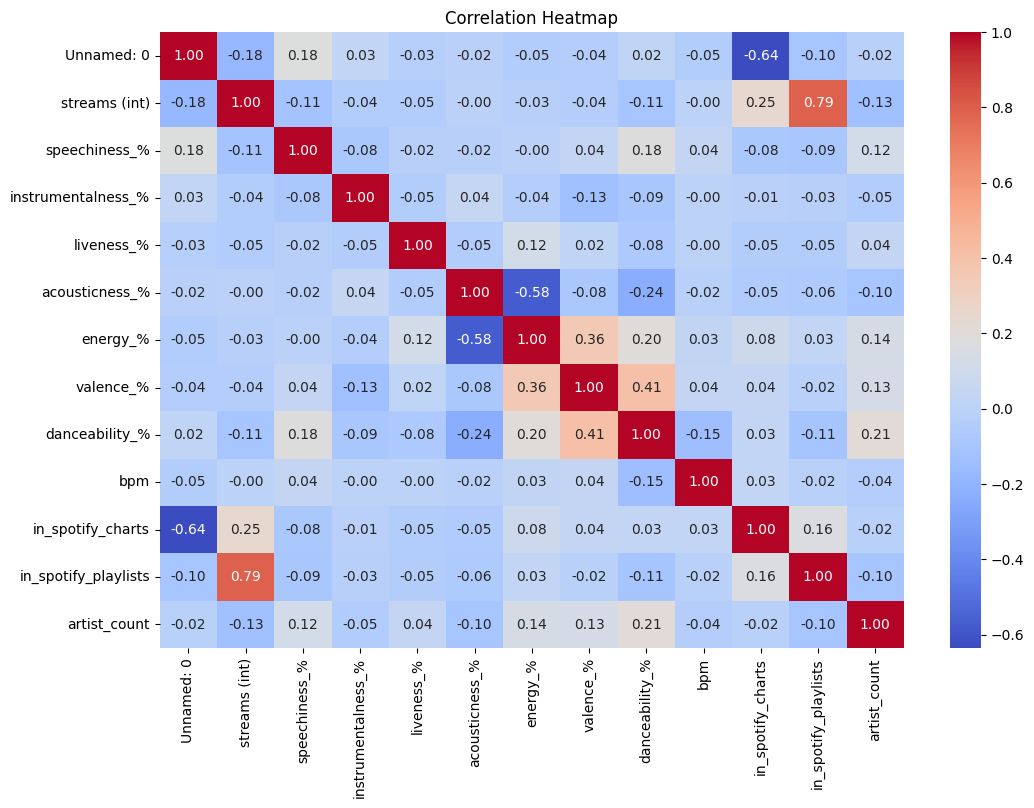

In [31]:
# Correlation Matrix - HeatMap
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix
data = pd.read_csv("spotify-2023-filtered.csv")
corr_matrix = data.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   streams (int)         952 non-null    float64
 1   speechiness_%         953 non-null    int64  
 2   instrumentalness_%    953 non-null    int64  
 3   liveness_%            953 non-null    int64  
 4   acousticness_%        953 non-null    int64  
 5   energy_%              953 non-null    int64  
 6   valence_%             953 non-null    int64  
 7   danceability_%        953 non-null    int64  
 8   bpm                   953 non-null    int64  
 9   in_spotify_charts     953 non-null    int64  
 10  in_spotify_playlists  953 non-null    int64  
 11  artist_count          953 non-null    int64  
 12  artist(s)_name        953 non-null    object 
 13  mode                  953 non-null    object 
dtypes: float64(1), int64(11), object(2)
memory usage: 104.4+ KB
